# Step-by-Step Process:
- Load the Data
- Exploratory Data Analysis (EDA)
- Data Preprocessing
- Model Training and Evaluation

In [1]:
# pip install nbimporter 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix,roc_curve,accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report # Evaluation metrics
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import validation_curve 
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

In [3]:
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

In [4]:
# Load the data
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


In [5]:
data.shape

(6819, 96)

In [6]:
# Basic information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [8]:
# Summary statistics
summary_stats = data.describe()
summary_stats

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [9]:
# Distribution of the target variable
target_distribution = data['Bankrupt?'].value_counts(normalize=True)
target_distribution

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64

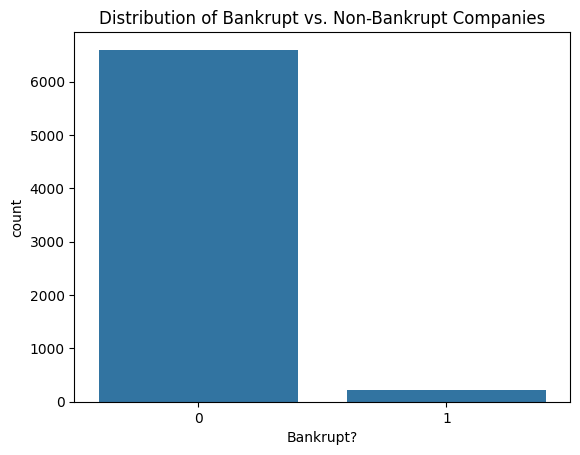

In [10]:
# Plotting the distribution of the target variable
sns.countplot(x='Bankrupt?', data=data)
plt.title('Distribution of Bankrupt vs. Non-Bankrupt Companies')
plt.show()



Columns with correlation > 0.0 with Bankrupt?:
                                      Bankrupt?
Bankrupt?                              1.000000
 Debt ratio %                          0.250161
 Borrowing dependency                  0.176543
 Current Liability to Assets           0.194494
 Current Liabilities/Equity            0.153828
 Total expense/Assets                  0.139049
 Current Liability to Equity           0.153828
 Equity to Long-term Liability         0.139014
 Current Liability to Current Assets   0.171306
 Liability-Assets Flag                 0.139212
 Liability to Equity                   0.166812


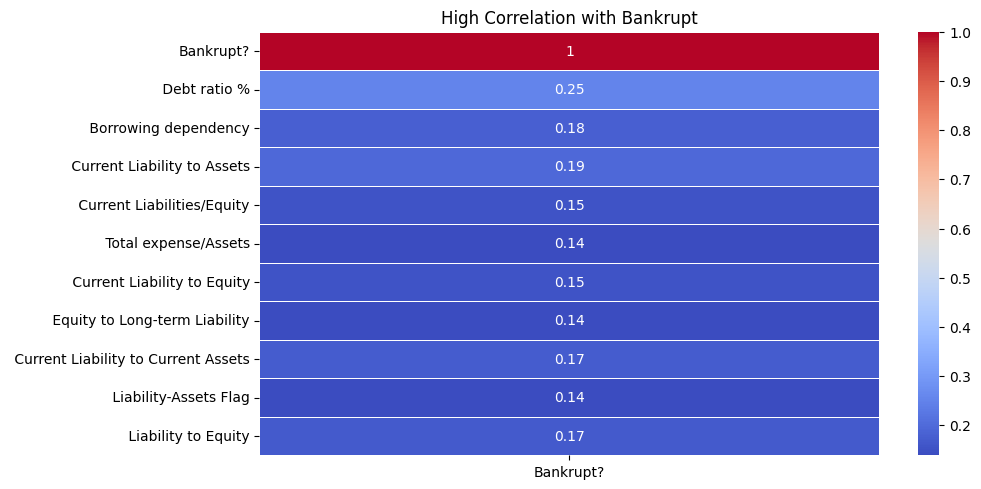

In [11]:
df_train_encoded = pd.get_dummies(data)

correlation_matrix = df_train_encoded.corr()

outcome_correlation = correlation_matrix[['Bankrupt?']]

high_correlation = outcome_correlation[(outcome_correlation['Bankrupt?']) >= 0.1]
print('Columns with correlation > 0.0 with Bankrupt?:')
print(high_correlation)


plt.figure(figsize=(10, len(high_correlation) * 0.5))
sns.heatmap(high_correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('High Correlation with Bankrupt')
plt.show()


                                      Feature  Importance
89         Net Income to Stockholder's Equity    0.031123
29                      Net Value Growth Rate    0.029454
39                       Borrowing dependency    0.024325
18    Persistent EPS in the Last Four Seasons    0.023858
22   Per Share Net profit before tax (Yuan ¥)    0.020301
..                                        ...         ...
75                     Fixed Assets to Assets    0.005915
31                        Cash Reinvestment %    0.005626
14                               Tax rate (A)    0.002257
84                      Liability-Assets Flag    0.000242
93                            Net Income Flag    0.000000

[95 rows x 2 columns]


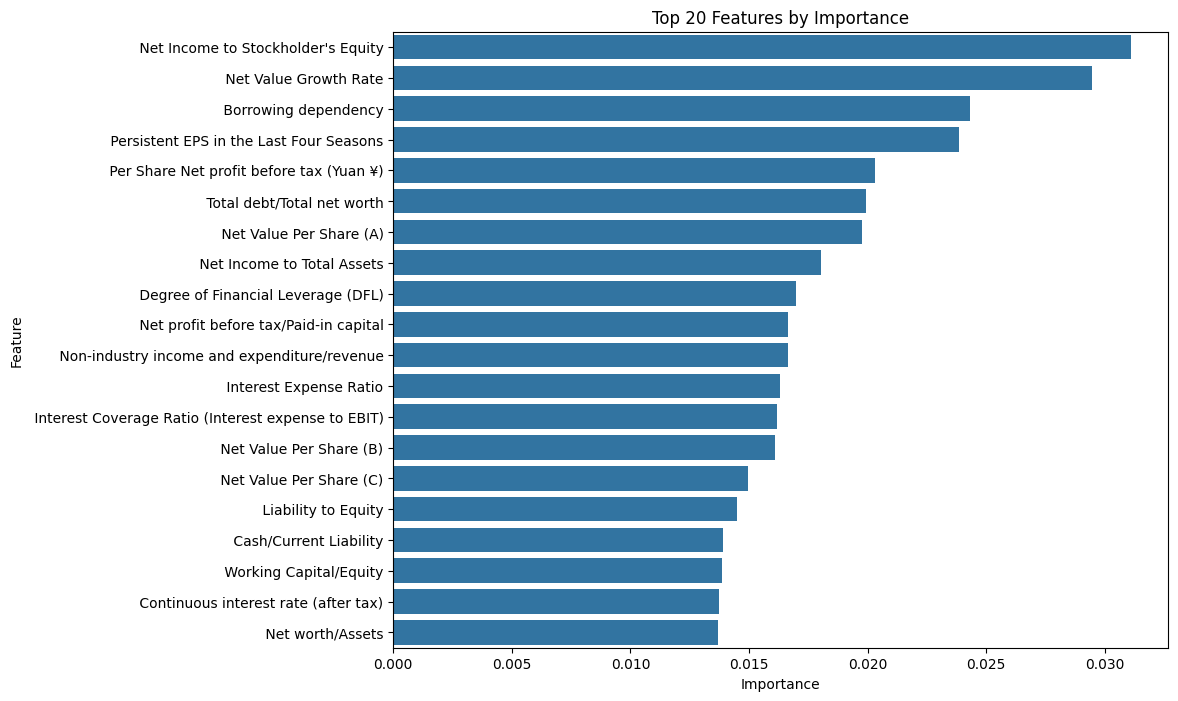

In [12]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np


X = df_train_encoded.drop(columns=['Bankrupt?'])
y = df_train_encoded['Bankrupt?']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)


importances = model.feature_importances_
feature_names = X.columns


feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Features by Importance')
plt.show()


In [13]:
data = data.rename(
    columns={
        ' Net worth/Assets': ' Net Worth to Assets', 
        ' Cash/Total Assets': ' Cash to Total Assets',
        ' Total debt/Total net worth': ' Total Debt to Net Worth',
        ' Debt ratio %': ' Debt Ratio',
        ' Cash/Current Liability': ' Cash to Current Liability',
        ' Total expense/Assets': ' Total Expense to Assets',
        ' Inventory and accounts receivable/Net value': ' Inventory and Accounts Receivable to Net Value',
        ' Net Worth Turnover Rate (times)': ' Net Worth Turnover Rate',
        ' Inventory/Current Liability': ' Inventory to Current Liability',
        ' Current Liability to Equity': ' Current Liabilities to Equity',
        ' Borrowing dependency': ' Borrowing Dependency',

        }
        )


In [14]:
corrected_columns=[
    'Bankrupt?',
    ' Net Income to Total Assets',
    ' Net Worth to Assets',
    ' Net Value Growth Rate',
    ' Working Capital to Total Assets',
    ' Cash to Total Assets',
    ' Retained Earnings to Total Assets',
    ' Quick Ratio',
    ' Total Debt to Net Worth',
    ' Debt Ratio',
    ' Borrowing Dependency',
    ' Cash to Current Liability',
    ' Current Liability to Assets',
    ' Equity to Long-term Liability',
    ' Current Liability to Current Assets',
    ' Liability-Assets Flag',
    ' Liability to Equity',
    ' Total Expense to Assets',
    ' Inventory and Accounts Receivable to Net Value',
    ' Net Worth Turnover Rate',
    ' Inventory to Current Liability',
    ' Current Liabilities to Equity',
    ' Long-term Liability to Current Assets',
    ' Current Asset Turnover Rate',
    ' Quick Asset Turnover Rate',
]
# تحديد الأعمدة الصحيحة من DataFrame
bank_data = data[corrected_columns]


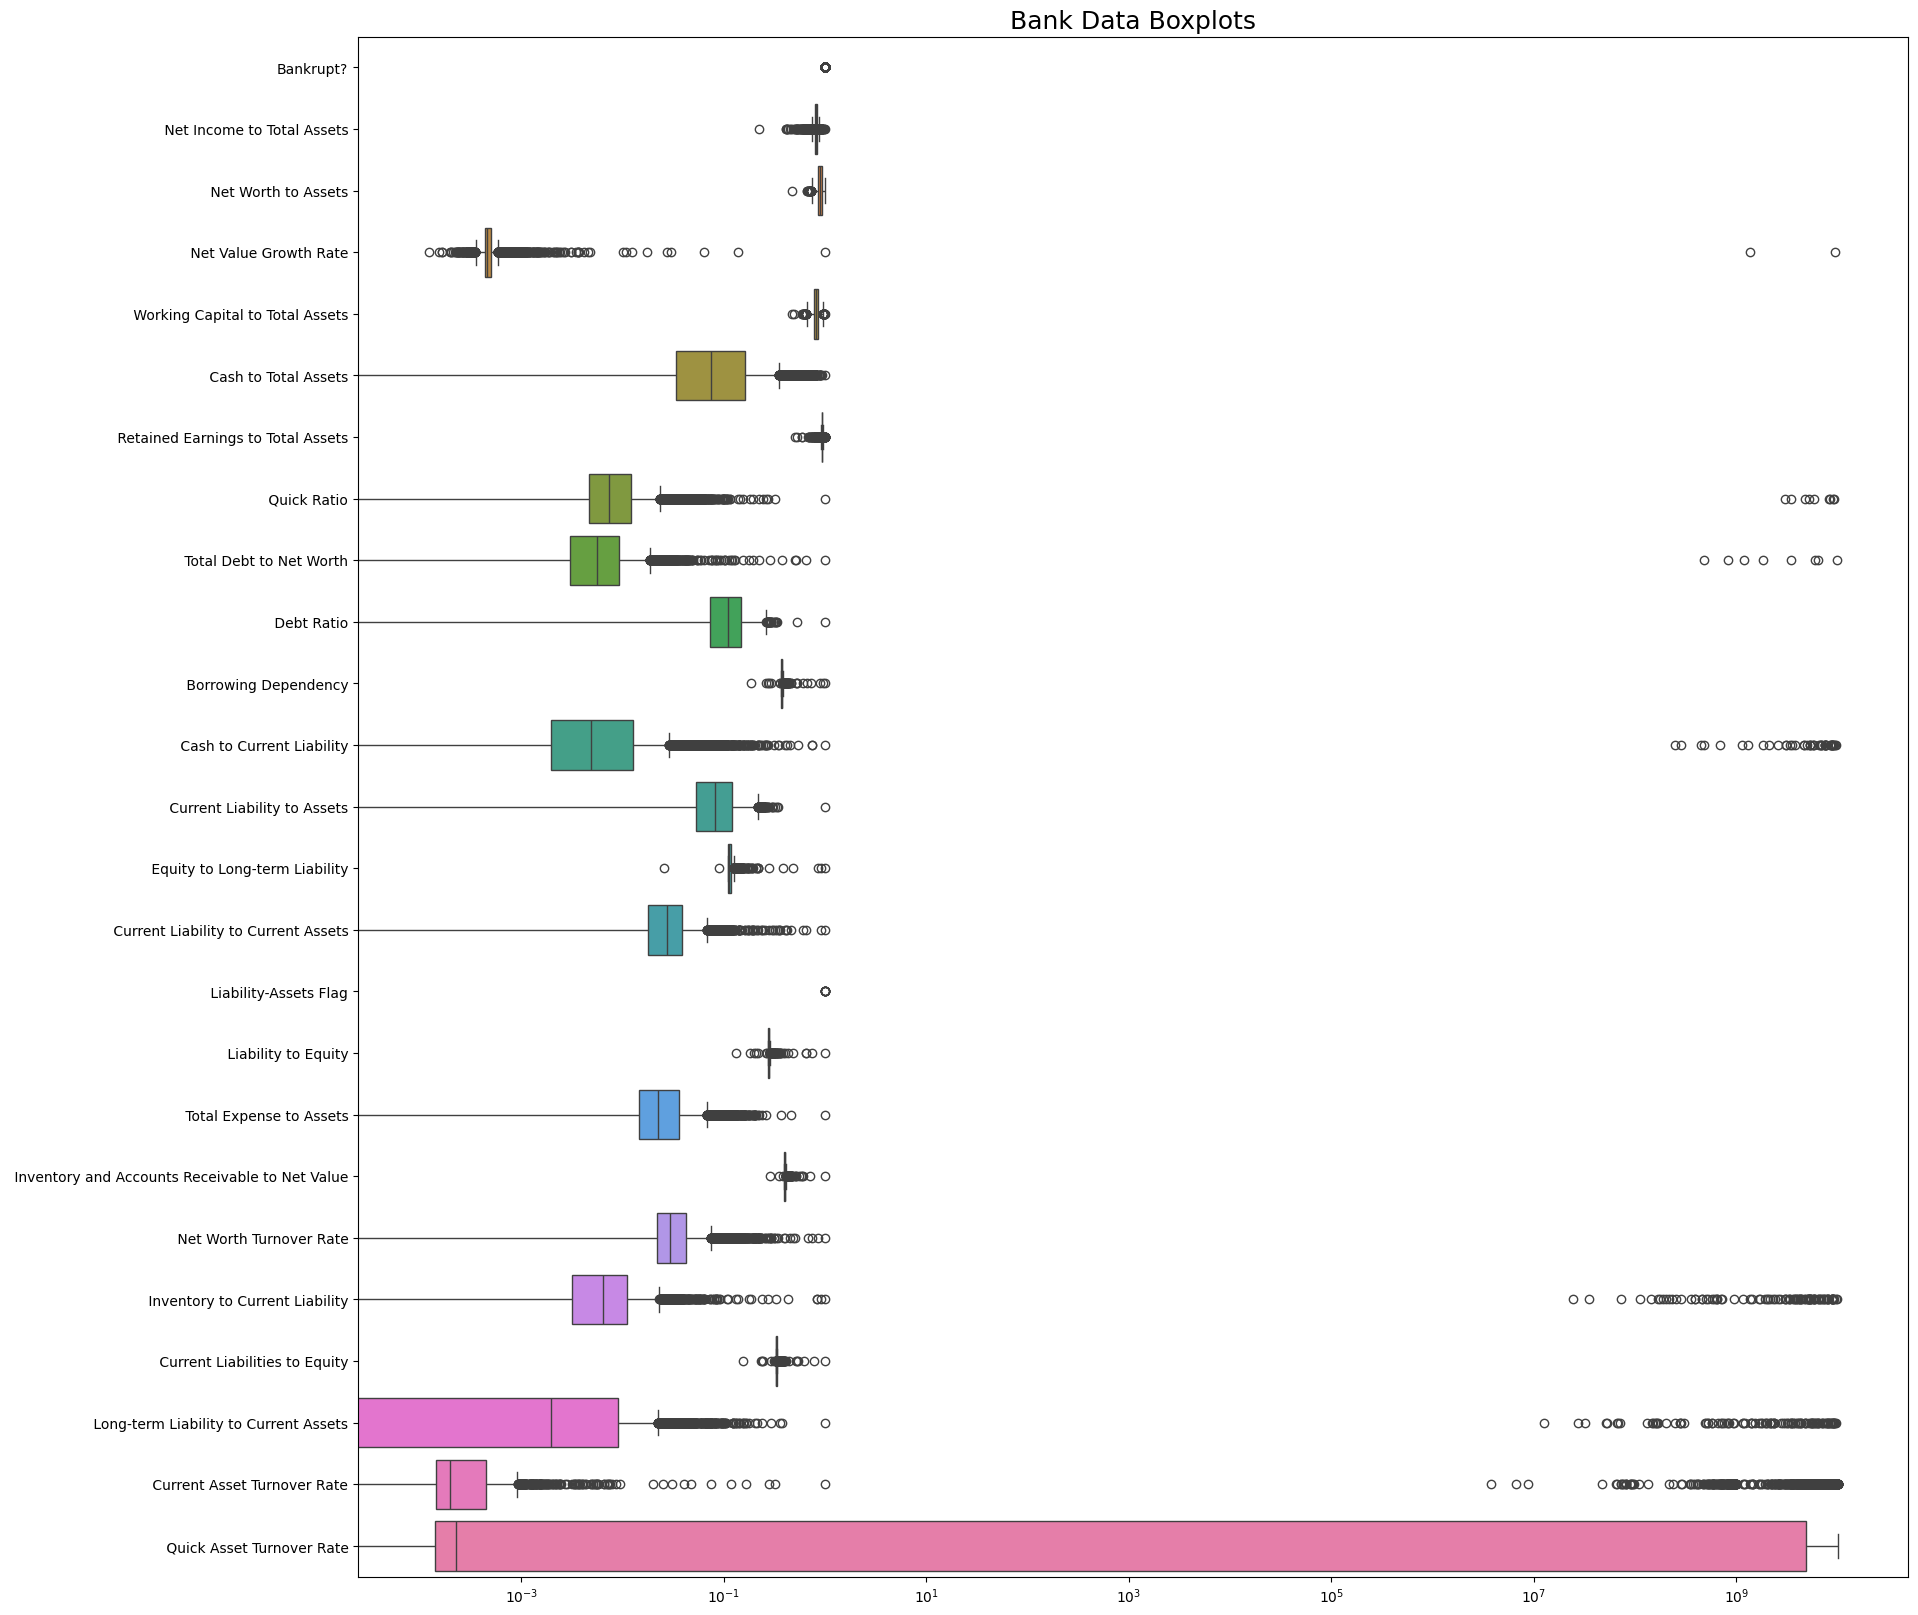

In [15]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = bank_data, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

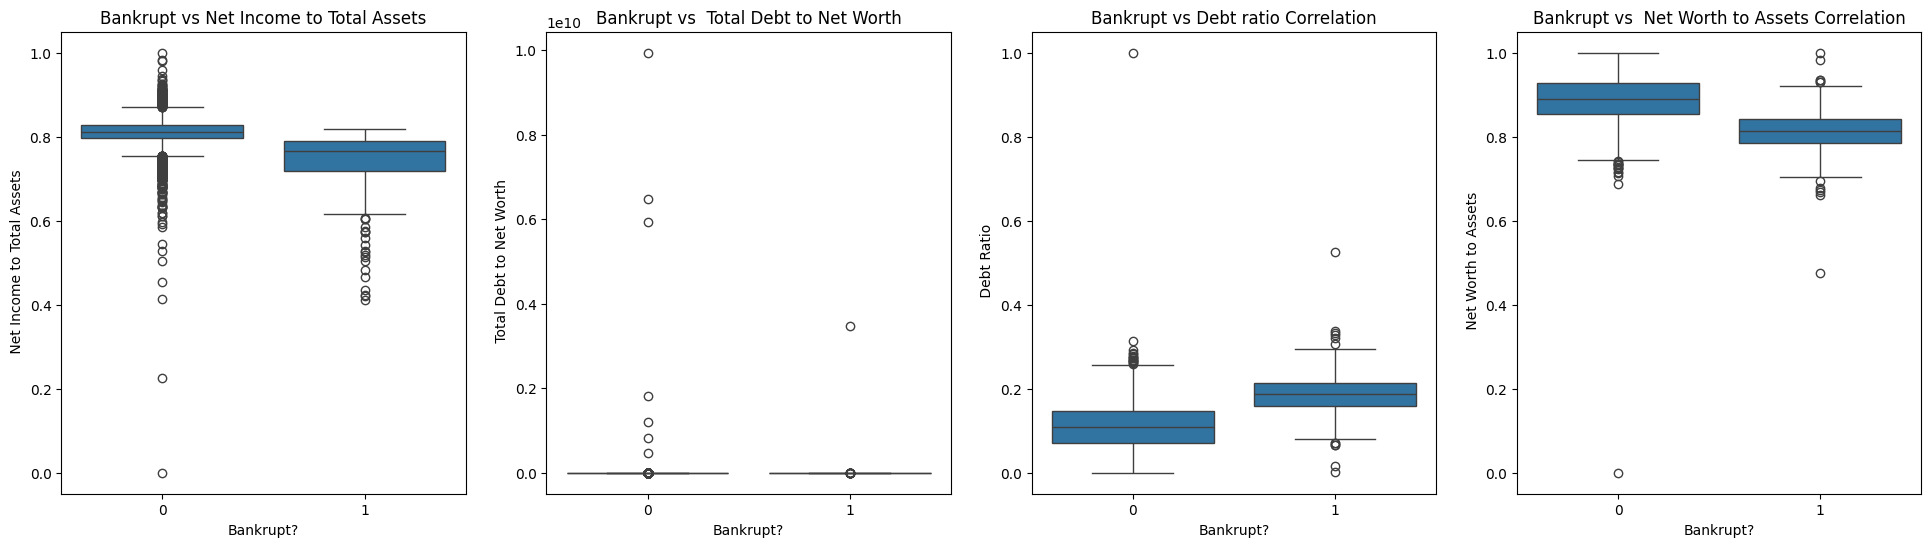

In [16]:
# Plotting interesting features

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y=" Net Income to Total Assets", data=bank_data, ax=axes[0])
axes[0].set_title('Bankrupt vs Net Income to Total Assets')

sns.boxplot(x='Bankrupt?', y=" Total Debt to Net Worth", data=bank_data, ax=axes[1]) 
axes[1].set_title('Bankrupt vs  Total Debt to Net Worth')


sns.boxplot(x='Bankrupt?', y=" Debt Ratio", data=bank_data, ax=axes[2])
axes[2].set_title('Bankrupt vs Debt ratio Correlation')


sns.boxplot(x='Bankrupt?', y=" Net Worth to Assets", data=bank_data, ax=axes[3])  
axes[3].set_title('Bankrupt vs  Net Worth to Assets Correlation') 

plt.show()

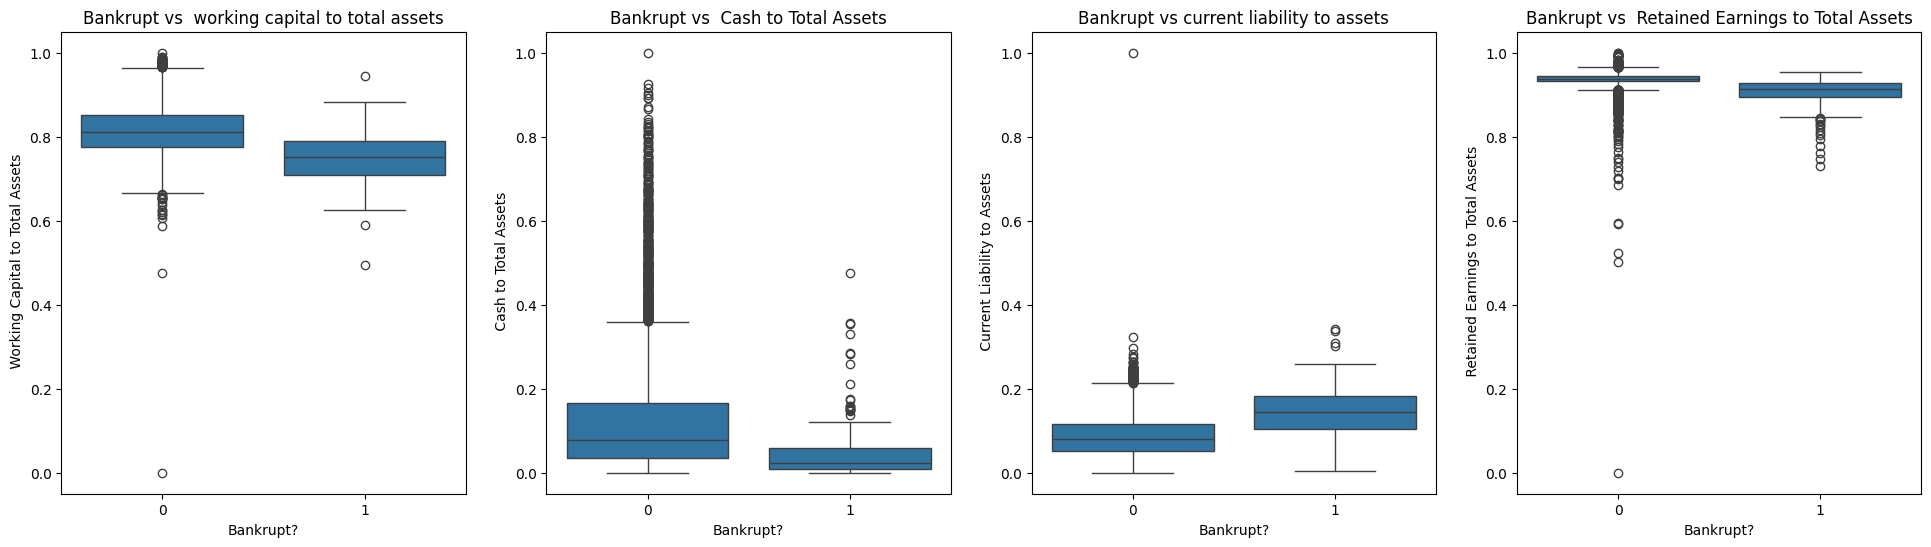

In [17]:
# Plotting other interesting features

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y=" Working Capital to Total Assets", data=bank_data, ax=axes[0])
axes[0].set_title('Bankrupt vs  working capital to total assets')

sns.boxplot(x='Bankrupt?', y=" Cash to Total Assets", data=bank_data, ax=axes[1])
axes[1].set_title('Bankrupt vs  Cash to Total Assets')


sns.boxplot(x='Bankrupt?', y=" Current Liability to Assets", data=bank_data, ax=axes[2])
axes[2].set_title('Bankrupt vs current liability to assets')


sns.boxplot(x='Bankrupt?', y=" Retained Earnings to Total Assets", data=bank_data, ax=axes[3])
axes[3].set_title('Bankrupt vs  Retained Earnings to Total Assets')

plt.show()

Outliers removal

In [18]:
# Outliers removal

def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in bank_data.columns:
    if col != 'Bankrupt?':  
        new_df = outliers_removal(bank_data[col], str(col), bank_data)
    

Quartile 25: 0.7967498491931705 | Quartile 75: 0.8264545295408715
iqr: 0.029704680347701018
Cut Off: 0.04455702052155153
 Net Income to Total Assets Lower: 0.752192828671619
 Net Income to Total Assets Upper: 0.871011550062423
 Net Income to Total Assets outliers for close to bankruptcy cases: 561
-----------------------------------------------------------------
Quartile 25: 0.8511956948937329 | Quartile 75: 0.927109471838438
iqr: 0.07591377694470502
Cut Off: 0.11387066541705754
 Net Worth to Assets Lower: 0.7373250294766753
 Net Worth to Assets Upper: 1.0409801372554954
 Net Worth to Assets outliers for close to bankruptcy cases: 30
-----------------------------------------------------------------
Quartile 25: 0.0004409688868264 | Quartile 75: 0.000499362141038
iqr: 5.839325421160002e-05
Cut Off: 8.758988131740003e-05
 Net Value Growth Rate Lower: 0.00035337900550899996
 Net Value Growth Rate Upper: 0.0005869520223554
 Net Value Growth Rate outliers for close to bankruptcy cases: 792


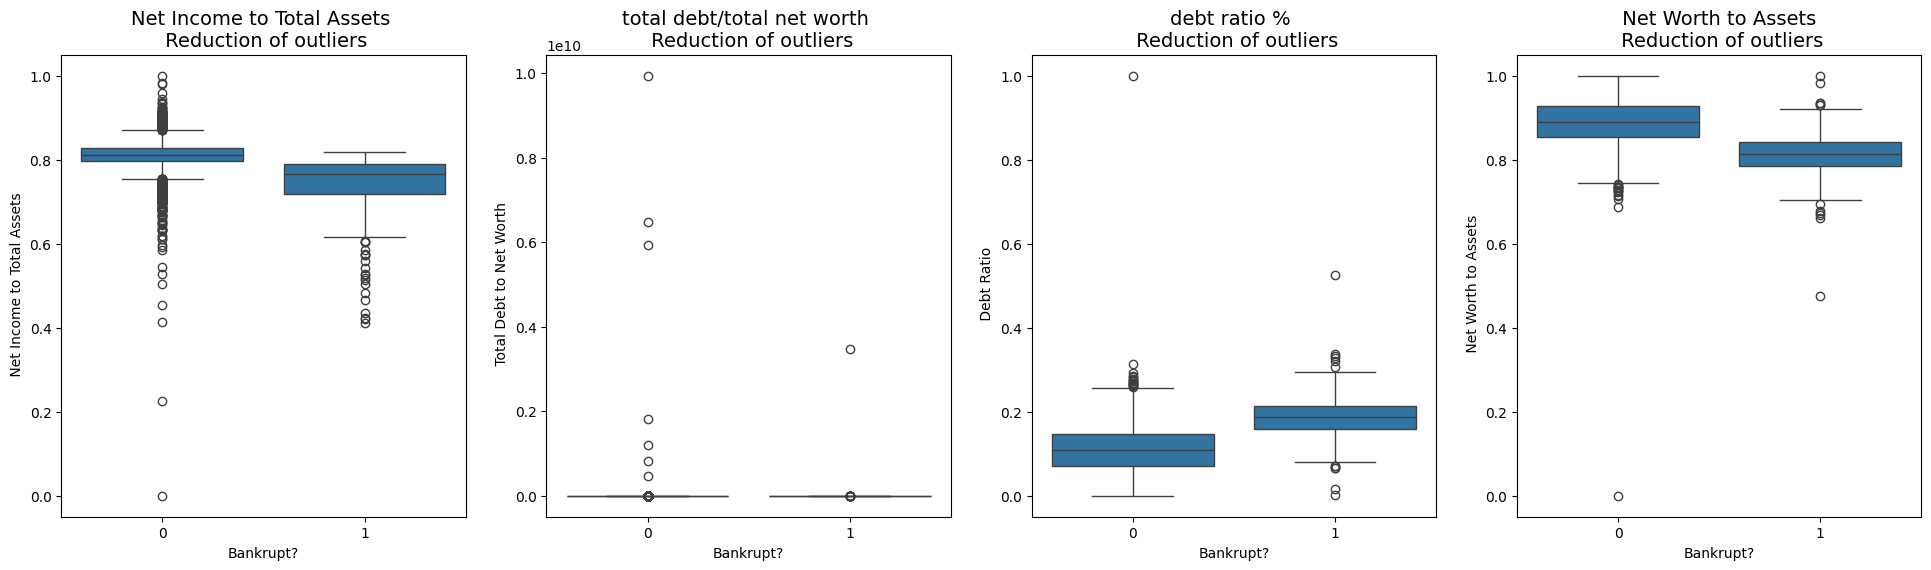

In [19]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))

# Boxplots with outliers removed

sns.boxplot(x="Bankrupt?", y=" Net Income to Total Assets", data=new_df,ax=ax1) 
ax1.set_title("Net Income to Total Assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=" Total Debt to Net Worth", data=new_df,ax=ax2) 
ax2.set_title("total debt/total net worth \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=" Debt Ratio", data=new_df,ax=ax3) 
ax3.set_title("debt ratio % \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=' Net Worth to Assets', data=new_df,ax=ax4) 
ax4.set_title(" Net Worth to Assets \n Reduction of outliers", fontsize=14)
        
plt.show()

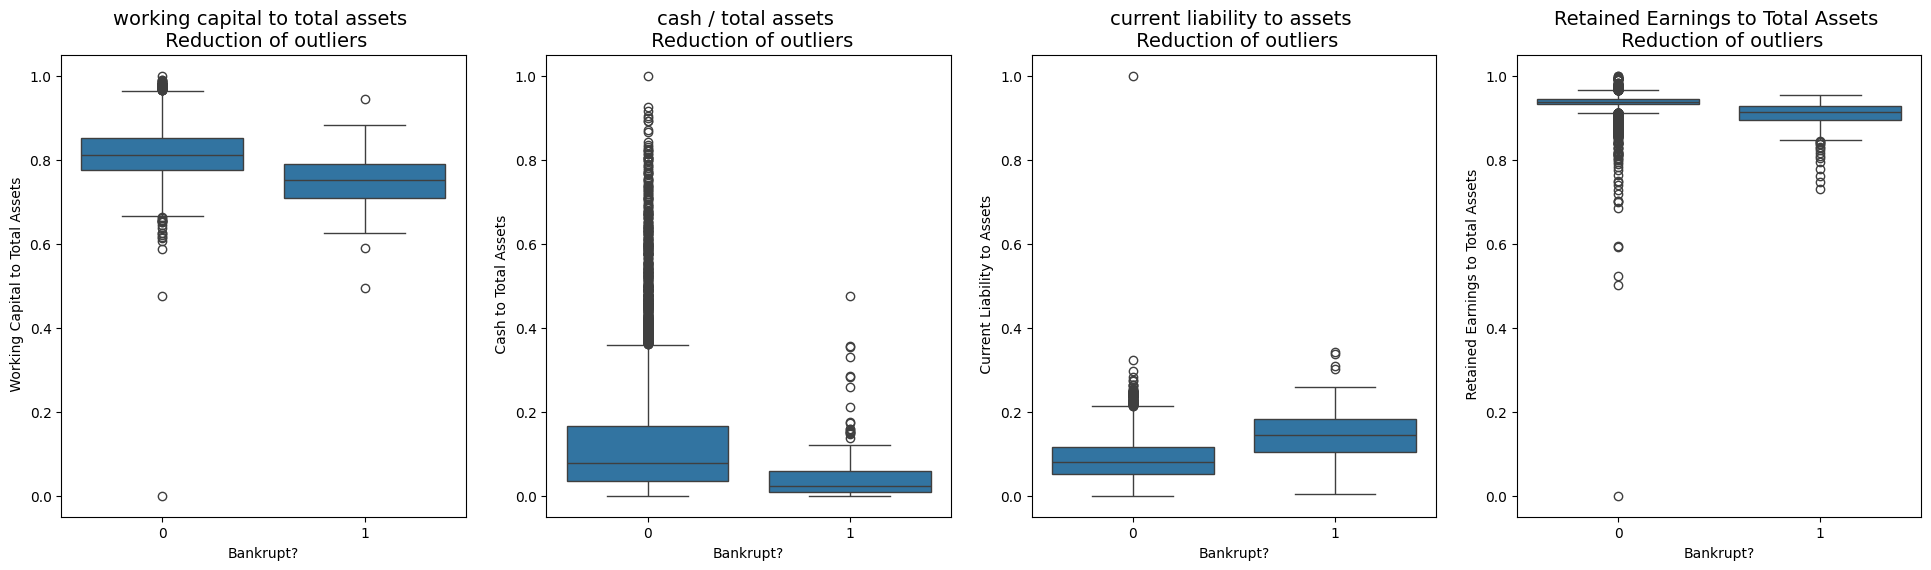

In [20]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))

# Boxplots with outliers removed

sns.boxplot(x="Bankrupt?", y=' Working Capital to Total Assets', data=new_df,ax=ax1) 
ax1.set_title("working capital to total assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=' Cash to Total Assets', data=new_df,ax=ax2) 
ax2.set_title("cash / total assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=' Current Liability to Assets', data=new_df,ax=ax3) 
ax3.set_title("current liability to assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt?", y=' Retained Earnings to Total Assets', data=new_df,ax=ax4) 
ax4.set_title("Retained Earnings to Total Assets \n Reduction of outliers", fontsize=14)
        
plt.show()

In [21]:
# Splitting the data into features and target
X = bank_data.drop('Bankrupt?', axis=1)
y = bank_data['Bankrupt?']

In [22]:
X.shape

(6819, 24)

In [23]:
# Assuming X is your feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Let's apply RandomForestClassifier without processing imbalanced data 
- Let's see the results

In [25]:

rf = RandomForestClassifier()


rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)

# Evaluate using evaluation scores
accuracy = accuracy_score(y_test, y_pred)
print(" Accuracy:", accuracy)
recall = recall_score(y_test, y_pred)
print(" Recall:", recall)
f1 = f1_score(y_test, y_pred)
print(" F1-score:", f1)
conf_matrix = confusion_matrix(y_test, y_pred)

 Accuracy: 0.967008797653959
 Recall: 0.17647058823529413
 F1-score: 0.2857142857142857


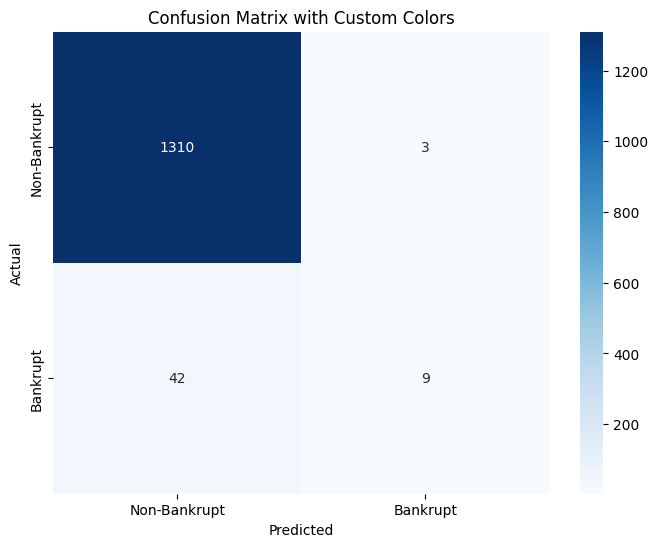

In [26]:
# Customize and plot the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Custom Colors')
plt.show()

In [27]:
# Evaluate using classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.75      0.18      0.29        51

    accuracy                           0.97      1364
   macro avg       0.86      0.59      0.63      1364
weighted avg       0.96      0.97      0.96      1364



# Undersampling
Undersampling involves reducing the number of instances in the majority class to balance the class distribution. This is done by randomly removing samples from the majority class so that its size is closer to that of the minority class. 

In [28]:

rus = RandomUnderSampler(random_state=42)
X_train_resampled_under, y_train_resampled_under = rus.fit_resample(X_train, y_train)

# Create and train the Random Forest model
rf_rus = RandomForestClassifier(random_state=42)
rf_rus.fit(X_train_resampled_under, y_train_resampled_under)


y_pred = rf_rus.predict(X_test)


accuracy_rus = accuracy_score(y_test, y_pred)
print("Undersampling Accuracy:", accuracy_rus)
recall_rus = recall_score(y_test, y_pred)
print("Undersampling Recall:", recall_rus)
f1_rus = f1_score(y_test, y_pred)
print("Undersampling F1-score:", f1_rus)
conf_matrix = confusion_matrix(y_test, y_pred)

Undersampling Accuracy: 0.843841642228739
Undersampling Recall: 0.8627450980392157
Undersampling F1-score: 0.292358803986711


In [29]:
X_train_resampled_under.shape

(338, 24)

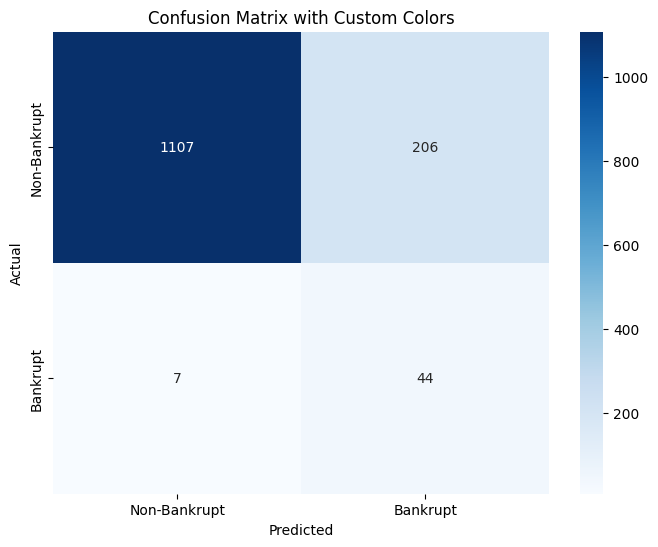

In [30]:
# Customize and plot the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Custom Colors')
plt.show()

In [31]:
# Evaluate using classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1313
           1       0.18      0.86      0.29        51

    accuracy                           0.84      1364
   macro avg       0.58      0.85      0.60      1364
weighted avg       0.96      0.84      0.89      1364



# Oversampling
Oversampling is another technique used to address class imbalance , it involves increasing the number of instances in the minority class to balance the class distribution

In [32]:

ros = RandomOverSampler(random_state=42)
X_train_resampled_over, y_train_resampled_over = ros.fit_resample(X_train, y_train)

# Create and train the Random Forest model
rf_ros = RandomForestClassifier(random_state=42)
rf_ros.fit(X_train_resampled_over, y_train_resampled_over)


y_pred = rf_ros.predict(X_test)


accuracy_ros = accuracy_score(y_test, y_pred)
print("Oversampling Accuracy:", accuracy_ros)
recall_ros = recall_score(y_test, y_pred)
print("Oversampling Recall:", recall_ros)
f1_ros = f1_score(y_test, y_pred)
print("Oversampling F1-score:", f1_ros)
conf_matrix = confusion_matrix(y_test, y_pred)

Oversampling Accuracy: 0.966275659824047
Oversampling Recall: 0.2549019607843137
Oversampling F1-score: 0.3611111111111111


In [33]:
X_train_resampled_over.shape

(10572, 24)

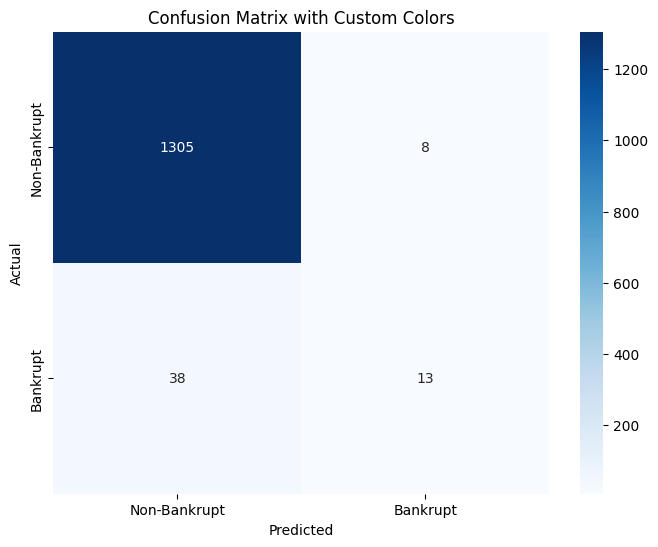

In [34]:
# Customize and plot the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Custom Colors')
plt.show()

In [35]:
# Evaluate using classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.62      0.25      0.36        51

    accuracy                           0.97      1364
   macro avg       0.80      0.62      0.67      1364
weighted avg       0.96      0.97      0.96      1364



Oversampling for Random Forest is the better version compared to  model Without data processing  and model with Undersampling

# SMOTE (Synthetic Minority Over-sampling Technique)
is a technique used to address class imbalance in datasets. It generates synthetic samples for the minority class by interpolating between existing samples. This helps to balance the dataset 

In [36]:

smote = SMOTE(random_state=42)
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train, y_train)

# Create and train the Random Forest model
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_resampled_smote, y_train_resampled_smote)

y_pred = rf_smote.predict(X_test)


accuracy_smote = accuracy_score(y_test, y_pred)
print("SMOTE Accuracy:", accuracy_smote)
recall_smote = recall_score(y_test, y_pred)
print("SMOTE Recall:", recall_smote)
f1_smote = f1_score(y_test, y_pred)
print("SMOTE F1-score:", f1_smote)
conf_matrix = confusion_matrix(y_test, y_pred)

SMOTE Accuracy: 0.9384164222873901
SMOTE Recall: 0.47058823529411764
SMOTE F1-score: 0.36363636363636365


In [37]:
X_train_resampled_smote.shape

(10572, 24)

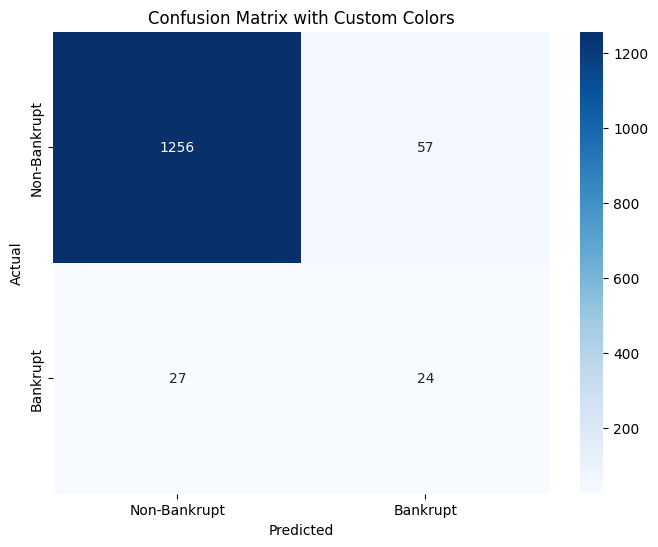

In [38]:
# Customize and plot the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Custom Colors')
plt.show()

In [39]:
# Evaluate using classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1313
           1       0.30      0.47      0.36        51

    accuracy                           0.94      1364
   macro avg       0.64      0.71      0.67      1364
weighted avg       0.95      0.94      0.95      1364



# Applay SMOTE

In [40]:
# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

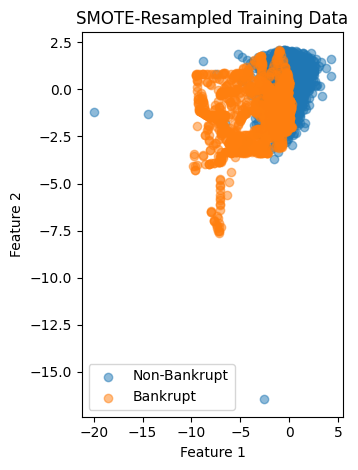

In [41]:
# Plotting the SMOTE-resampled training data
plt.subplot(1, 2, 2)
plt.scatter(X_train_smote[y_train_smote == 0][:, 0], X_train_smote[y_train_smote == 0][:, 1], label='Non-Bankrupt', alpha=0.5)
plt.scatter(X_train_smote[y_train_smote == 1][:, 0], X_train_smote[y_train_smote == 1][:, 1], label='Bankrupt', alpha=0.5)
plt.title('SMOTE-Resampled Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
# Creating a DataFrame for the SMOTE-resampled data
X_train_smote_df = pd.DataFrame(X_train_smote, columns=X.columns)
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['Bankrupt?'])
smote_data = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

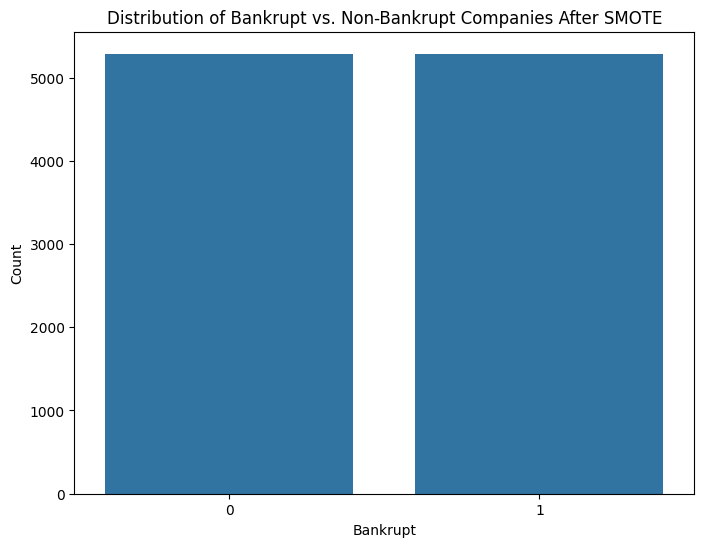

In [43]:
# Plotting the distribution of the target variable after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x='Bankrupt?', data=smote_data)
plt.title('Distribution of Bankrupt vs. Non-Bankrupt Companies After SMOTE')
plt.xlabel('Bankrupt')
plt.ylabel('Count')
plt.show()

# Modeling


In [44]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [45]:
# from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


models = {
    #'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'MLP': MLPClassifier(),
    'Bagging': BaggingClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

param_grids = {
    'Logistic' : {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear', 'saga']
        },

    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        # 'classifier__max_features': ['auto', 'sqrt', 'log2'],
        'classifier__max_depth': [4, 8, 12],
        # 'classifier__criterion': ['gini', 'entropy']
        },
        'Gradient Boosting' : {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [3, 4, 5, 6],
            # 'classifier__subsample': [0.8, 0.9, 1.0],
            # 'classifier__min_samples_split': [2, 5, 10],
            # 'classifier__min_samples_leaf': [1, 2, 4]
        },
    'MLP': {
        'classifier__hidden_layer_sizes': [(50,), (100,)],
        'classifier__activation': ['tanh', 'relu'],
        'classifier__solver': ['sgd', 'adam'],
        'classifier__alpha': [0.0001, 0.001, 0.01],
        # 'classifier__learning_rate': ['constant', 'adaptive']
    },
    'Bagging': {
        'classifier__n_estimators': [10, 20, 50],
        'classifier__max_samples': [0.5, 0.7, 1.0],
        'classifier__max_features': [0.5, 0.7, 1.0]
    },
    
    'Decision Tree': {
        # 'classifier__criterion': ['gini', 'entropy'],
        'classifier__splitter': [ 'random'],
        'classifier__max_depth': [None, 10,50],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 5, 10],
        # 'classifier__max_features': [None, 'auto', 'sqrt', 'log2']
    }
}



In [46]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize results dataframe
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterate over models
for model_name, model in models.items():
    # Create a pipeline with SMOTE and the classifier
    pipeline = ImbPipeline(steps=[
        ('smote', SMOTE(random_state=42)),  # Apply SMOTE within the pipeline
        ('classifier', model)
    ])

    # Define scoring metrics
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='binary', zero_division=0),
        'recall': make_scorer(recall_score, average='binary', zero_division=0),
        'f1': make_scorer(f1_score, average='binary', zero_division=0)
    }

    # Perform cross-validation
    cv_results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

    # Calculate mean scores
    mean_accuracy = cv_results['test_accuracy'].mean()
    mean_precision = cv_results['test_precision'].mean()
    mean_recall = cv_results['test_recall'].mean()
    mean_f1_score = cv_results['test_f1'].mean()

    # Store results in DataFrame
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [mean_accuracy],
        'Precision': [mean_precision],
        'Recall': [mean_recall],
        'F1 Score': [mean_f1_score],
    })
    results_df = pd.concat([results_df, new_row], ignore_index=True)

    print(f'{model_name} Accuracy: {mean_accuracy}')
    print(f'{model_name} Precision: {mean_precision}')
    print(f'{model_name} Recall: {mean_recall}')
    print(f'{model_name} F1 Score: {mean_f1_score}')

# Display the final results DataFrame
print(results_df)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7784\24622847.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Random Forest Accuracy: 0.945737855178735
Random Forest Precision: 0.30828739887563417
Random Forest Recall: 0.5912655971479501
Random Forest F1 Score: 0.4039079140255611
Gradient Boosting Accuracy: 0.9055912007332723
Gradient Boosting Precision: 0.21818388052948748
Gradient Boosting Recall: 0.7807486631016042
Gradient Boosting F1 Score: 0.3402725422880698
MLP Accuracy: 0.9415215398716773
MLP Precision: 0.24607511781362473
MLP Recall: 0.43672014260249553
MLP F1 Score: 0.31269785472340894
Bagging Accuracy: 0.9422548120989918
Bagging Precision: 0.27118215252381245
Bagging Recall: 0.5083778966131908
Bagging F1 Score: 0.35228611725378656
Decision Tree Accuracy: 0.9244729605866178
Decision Tree Precision: 0.1902090413334791
Decision Tree Recall: 0.448663101604278
Decision Tree F1 Score: 0.266914557549471
               Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.945738   0.308287  0.591266  0.403908
1  Gradient Boosting  0.905591   0.218184  0.780749  0.340273
2  

# We Implemented StratifiedKFold Cross-Validation For:
- Handles Class Imbalance: StratifiedKFold maintains the class distribution in each fold, ensuring that all folds represent the overall dataset, which is crucial for imbalanced data.

- Reduces Variance: By averaging model performance across multiple folds, cross-validation provides a more reliable and stable estimate compared to a single train-test split.

- Mitigates Overfitting: Training and testing on different data subsets helps identify models that generalize well, reducing the risk of overfitting.

# SMOTE is Applied in Each Cross-Validation Fold for:
- Balanced Training Data: SMOTE is applied within each fold to ensure balanced class distribution in the training set, which is important for consistent model training.
- Prevents Data Leakage: Applying SMOTE within each fold avoids data leakage, ensuring that synthetic examples do not appear in the test set, preserving the integrity of performance estimates.
- Consistency Across Folds: This approach ensures that each model is evaluated on consistently processed data, leading to more reliable and comparable performance metrics.

In [47]:
best_model_name = results_df.loc[results_df['F1 Score'].idxmax(), 'Model']
best_model_score = results_df.loc[results_df['F1 Score'].idxmax(), 'F1 Score']
best_model = models[best_model_name]

# طباعة أفضل نموذج بناءً على R2 score
print(f'أفضل نموذج هو {best_model_name} مع F1 Score: {best_model_score}')

# حفظ النموذج الأفضل
best_pipeline = Pipeline(steps=[
  
    ('classifier', best_model)
])
best_pipeline.fit(X_train_smote, y_train_smote)
joblib.dump(best_pipeline, 'best_model.pkl')
print("تم حفظ النموذج الأفضل باسم best_model.pkl")

results_df.to_csv('model_comparison_results.csv', index=False)
print("تم حفظ نتائج المقارنة في model_comparison_results.csv")
# Save the results dataframe
results_df.to_csv('model_comparison_results.csv', index=False)
print("Model comparison results saved as 'model_comparison_results.csv'")
results_df

أفضل نموذج هو Random Forest مع F1 Score: 0.4039079140255611
تم حفظ النموذج الأفضل باسم best_model.pkl
تم حفظ نتائج المقارنة في model_comparison_results.csv
Model comparison results saved as 'model_comparison_results.csv'


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.945738,0.308287,0.591266,0.403908
1,Gradient Boosting,0.905591,0.218184,0.780749,0.340273
2,MLP,0.941522,0.246075,0.436720,0.312698
3,Bagging,0.942255,0.271182,0.508378,0.352286
4,Decision Tree,0.924473,0.190209,0.448663,0.266915


In [48]:
# Making predictions on the test set
y_pred = best_pipeline.predict(X_test)
y_pred_prob = best_pipeline.predict_proba(X_test)[:, 1]


In [49]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
classification_rep = classification_report(y_test, y_pred, zero_division=False)
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the results
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.94
ROC-AUC: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1313
           1       0.28      0.45      0.35        51

    accuracy                           0.94      1364
   macro avg       0.63      0.70      0.66      1364
weighted avg       0.95      0.94      0.94      1364



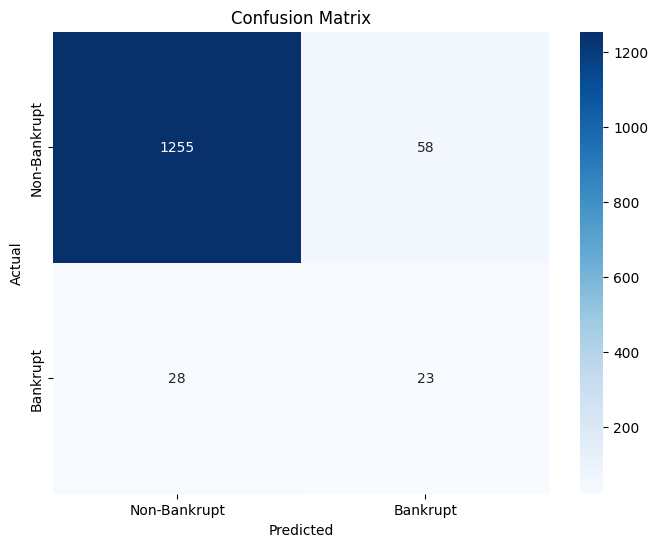

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [51]:
def load_best_model(model_path='best_model.pkl'):
    """Load the best trained model from a file."""
    return joblib.load(model_path)

def predict_financial_status(features):
  
    # Ensure the feature names are in the correct order, matching the training data
    feature_order = [
        'Net Income to Total Assets',
        'Net Worth to Assets',
        'Net Value Growth Rate',
        'Working Capital to Total Assets',
        'Cash to Total Assets',
        'Retained Earnings to Total Assets',
        'Quick Ratio',
        'Total Debt to Net Worth',
        'Debt Ratio',
        'Borrowing Dependency',
        'Cash to Current Liability',
        'Current Liability to Assets',
        'Equity to Long-term Liability',
        'Current Liability to Current Assets',
        'Liability-Assets Flag',
        'Liability to Equity',
        'Total Expense to Assets',
        'Inventory and Accounts Receivable to Net Value',
        'Net Worth Turnover Rate',
        'Inventory to Current Liability',
        'Current Liabilities to Equity',
        'Long-term Liability to Current Assets',
        'Current Asset Turnover Rate',
        'Quick Asset Turnover Rate',
    ]

    # Convert the input features to a numpy array in the correct order
    input_features = np.array([features[feature] for feature in feature_order]).reshape(1, -1)

    # Load the trained model pipeline
    model_pipeline = load_best_model()

    # Make a prediction
    prediction = model_pipeline.predict(input_features)

    return prediction[0]  # Return the predicted class



In [52]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



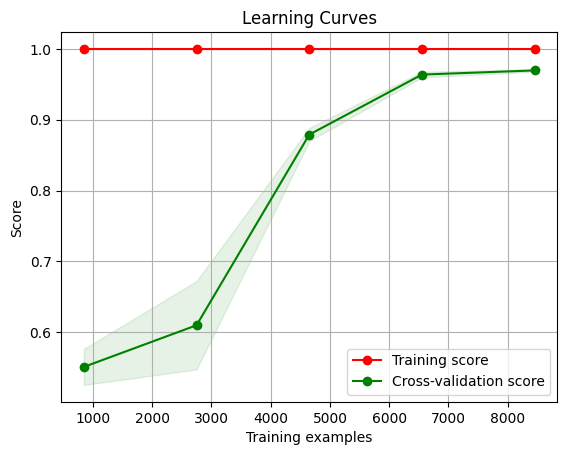

In [53]:
# Plotting learning curves
title = "Learning Curves"
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
plot_learning_curve(estimator, title, X_train_smote, y_train_smote, cv=5)
plt.show()

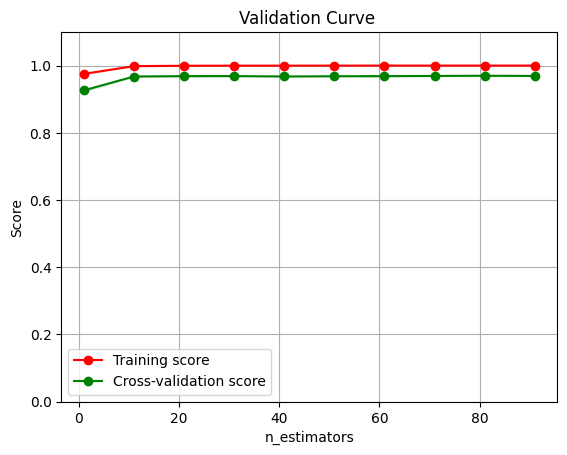

In [54]:
# Function to plot validation curves
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None, n_jobs=None):
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring="accuracy", n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    plt.grid()

    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(param_range, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(param_range, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
# Plotting validation curves
param_range = np.arange(1, 101, 10)
plot_validation_curve(estimator, "Validation Curve ", X_train_smote, y_train_smote, param_name="n_estimators", param_range=param_range, cv=5)
plt.show()


In [55]:

input_features = {
    'Net Income to Total Assets':0.0105,
    'Net Worth to Assets': 0.5894,
    'Net Value Growth Rate': 2.7090,
    'Working Capital to Total Assets': 0.1930,
    'Cash to Total Assets': 0.1081,
    'Retained Earnings to Total Assets': 0.2656,
    'Quick Ratio':1.0584,
    'Total Debt to Net Worth':0.0332,
    'Debt Ratio': 0.4033,
    'Borrowing Dependency': 0.0321,
    'Cash to Current Liability':0.4008,
    'Current Liability to Assets':  0.2697,
    'Equity to Long-term Liability': 7.5917,
    'Current Liability to Current Assets': 0.5828,
    'Liability-Assets Flag': 0,
    'Liability to Equity': 0.6842,
    'Total Expense to Assets': 0.000,
    'Inventory and Accounts Receivable to Net Value': 0.3094,
    'Net Worth Turnover Rate': 0.3309,
    'Inventory to Current Liability': 0.5444,
    'Current Liabilities to Equity': 0.4575,
    'Long-term Liability to Current Assets': 0.1678,
    'Current Asset Turnover Rate': 0.4215,
    'Quick Asset Turnover Rate': 0.6927
}

# Making a prediction
prediction = predict_financial_status(input_features)
print(f'Predicted Financial Status: {prediction}')


Predicted Financial Status: 0
